## Board Game Review Prediction
Presented by Eduonix!
Reviews can make or break a product; as a result, many companies take drastic measures to ensure that their product receives good reviews. When it comes to board games, reviews and word-of-mouth are everything. In this project, I will use regression models to predict the average review a board game will receive based on characteristics such as minimum and maximum number of players, playing time, complexity, etc.

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
games=pd.read_csv('games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [4]:
#we will try to predict avarage rating
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [5]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


# EDA

In [11]:
#lets look at the distribution of the avarage_rating

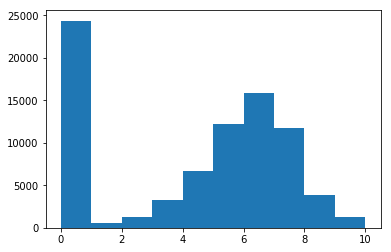

In [6]:
plt.hist(games['average_rating'])
plt.show()

In [18]:
#It is clear to see that nearly 25000 games have 0 rating (Outliers). Rest of the distribution is skewed to the right. 

In [19]:
#lets look at the first row of 0 value

In [7]:
games[games['average_rating']==0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

In [25]:
# I wont put outliers (0 ratings) into my model. I will delete this values . 

In [8]:
games=games[games['users_rated']>0]

games.dropna(axis=0,inplace=True)

In [30]:
#lets check the distribution of average ratings again

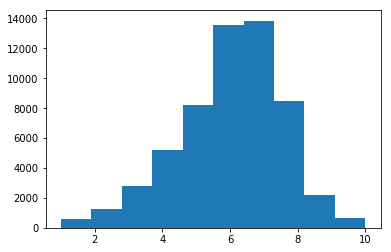

In [9]:
plt.hist(games['average_rating'])
plt.show()

In [32]:
#we eliminated outliers. 

In [34]:
#lets look at relationship between playing time and avarage rating

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


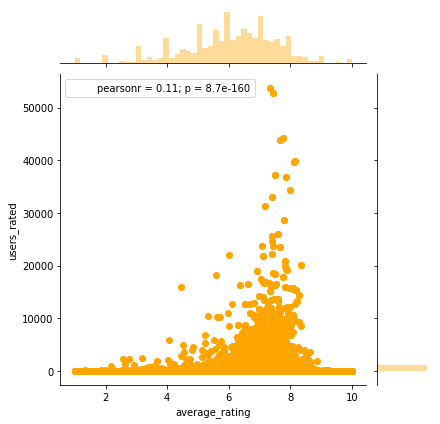

In [10]:
sns.jointplot(x='average_rating',y='users_rated',data=games,color='orange',)


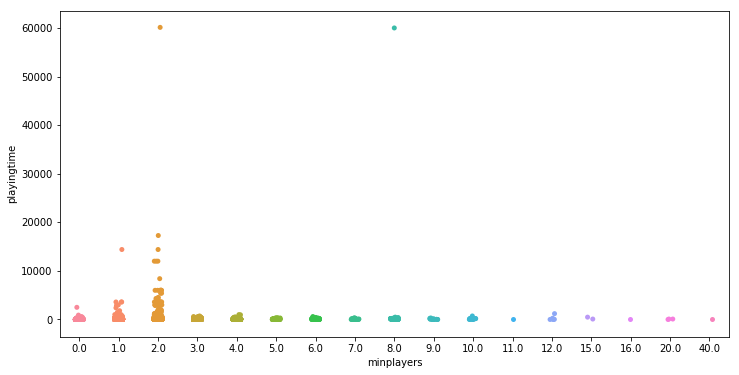

In [11]:
plt.figure(figsize=(12,6))
sns.stripplot(x='minplayers',y='playingtime',data=games,jitter=True)

In [54]:
#playing time is more dense when min players are 1 and 2. 

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


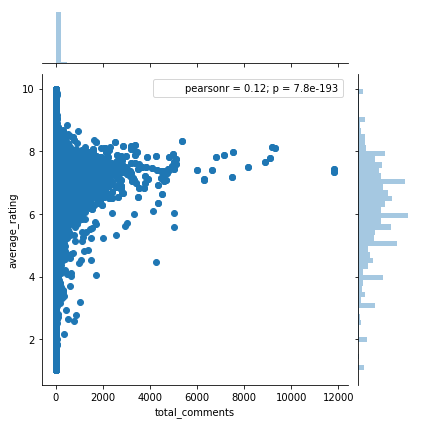

In [12]:
sns.jointplot(x='total_comments',y='average_rating',data=games)

In [57]:
#there is not a strong correlation between total commets and average ratings. 

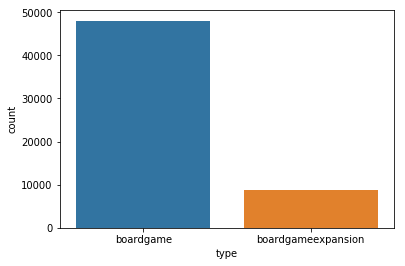

In [13]:
sns.countplot('type',data=games)

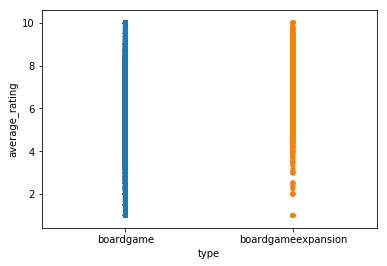

In [14]:
sns.stripplot(x='type',y='average_rating',data=games)

In [73]:
#boardganeexpansions have slightly better ratings.

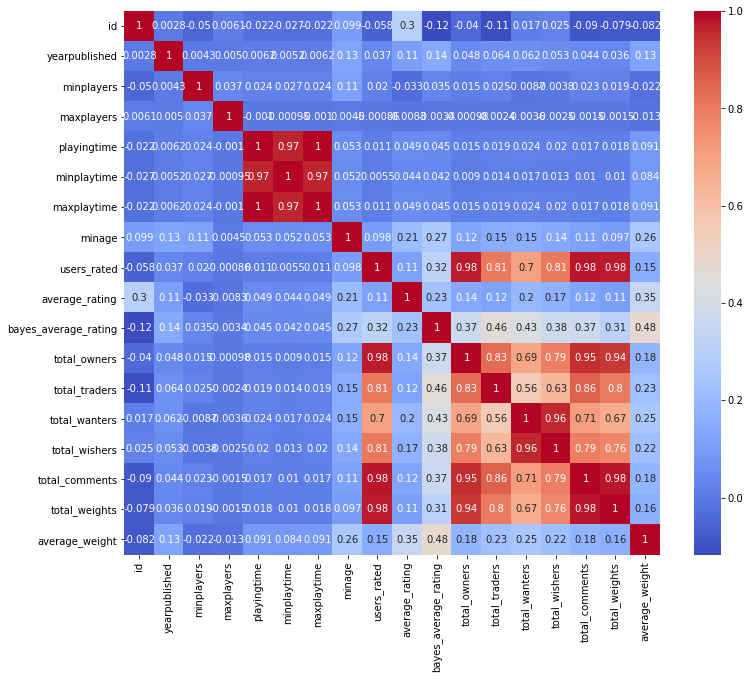

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(games.corr(),cmap='coolwarm',annot=True)

In [16]:
#Creating dummy variables for type to use in our regression model.
games['boardgameexpansion']=pd.get_dummies(games['type'],drop_first=True)
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight,boardgameexpansion
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,...,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785,0
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,...,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939,0
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,...,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761,0
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,...,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590,0
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,...,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943,0


In [65]:
#Average rating has weak positive correlation with avarage_weight
#minplaying time ,maxplaying time a and playing time are strongly positivelly correlated
#users_rated are strongly correlated with total_weights,total_comments,total_wishers,total_wanters,total_trades,total_owners
#total_owners,total_trades,total_wanters,total_wishers,total_comments and total_weihts are strongly positive correlated. 

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [ ]:
#I will not use 'id','bayes_average_rating and 'name' 

In [18]:
columns=games.columns.tolist()
columns=[c for c in columns if c not in ['id','name','bayes_average_rating','type','average_rating']]

In [19]:
X=games[columns]
y=games['average_rating']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Prediction

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error


In [23]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Lasso:',Lasso()],
       ['Ridge',Ridge()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()]]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name,rms)


Results...

Linear Regression : 1.3810606839000845
Lasso: 1.5124340443016728
Ridge 1.3810606620259613
Decision Tree Regression : 1.6973610141000697
Random Forest Regression : 1.2598802090929482
Gradient Boosting Regression : 1.2062675640646636
Ada Boosting Regression : 1.3013058181230697
Extra Tree Regression : 1.2874364122739885
K-Neighbors Regression : 1.332087475741976


In [24]:
#Gradient Boosting Regression algorithm performed better with the lowest Root Mean Square Error

In [25]:
grb=GradientBoostingRegressor()

In [26]:
grb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [27]:
prediction=grb.predict(X_test)

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.8588697272140727
MSE: 1.4549991938782165
RMSE: 1.2062334740332057


In [33]:
#Lets create a scatterplot of the real test values versus the predicted values.

Text(0,0.5,'predicted y')

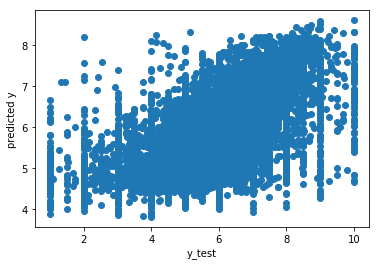

In [34]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('predicted y')

# Residuals

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


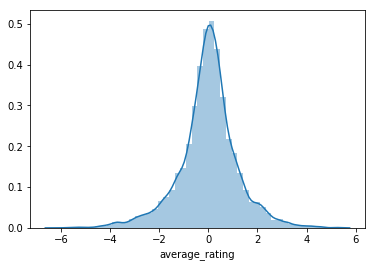

In [35]:
sns.distplot(y_test-prediction,bins=50)

In [36]:
#Residuals look normally distributed. 